In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/n/home11/abanerjee/vol_dense_seg/')

In [2]:
import torch
import random
import math
import numpy as np
import h5py as h5
import imageio
import matplotlib.pyplot as plt
import pickle
from tqdm.notebook import tqdm

from src.trainer import Trainer
from src.config import get_cfg_defaults

cfg = get_cfg_defaults()
cfg.merge_from_file('/n/home11/abanerjee/vol_dense_seg/configs/SNEMI_Masks.yaml')
cfg.AUGMENTOR.USE_COPY_PASTE = False
cfg.MODEL.INPUT_SIZE = (17,65,65)
cfg.SYSTEM.PARALLEL='DP'
cfg.SYSTEM.NUM_GPUS=1
cfg.MODEL.IN_PLANES=1
cfg.MODEL.OUT_PLANES=3
cfg.MONITOR.ITERATION_NUM=[1, 1]
cfg.SOLVER.SAMPLES_PER_BATCH=1 #2


trnr = Trainer(cfg, torch.device('cpu'), None,)

# SimplePointAttention(
#   (v_conv): Conv3d(32, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
#   (act): GELU()
#   (norm_act_conv_norm): Sequential(
#     (0): GroupNorm(128, 128, eps=1e-05, affine=True)
#     (1): GELU()
#     (2): Conv3d(128, 32, kernel_size=(1, 1, 1), stride=(1, 1, 1))
#     (3): GroupNorm(32, 32, eps=1e-05, affine=True)
#   )
# )

model:  DualDecoderFourierFPN4
Parallelism with DataParallel.
Optimizer:  SGDWithGradientClip
Build data dataset ===>


/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607369981906/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


Image shape: (108, 1152, 1152)
Label shape: (108, 1152, 1152)
Sample size required for the augmentor: [ 19 132 132]
Total number of samples to be generated:  93819690
Build data loader ===>
Experiment dir:  outputs/SNEMI3D/experiment_54


In [11]:
list(trnr.model.modules())[3:]

[DilatedBlock(
   (conv): ModuleList(
     (0): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False, padding_mode=replicate)
     (1): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(2, 2, 2), dilation=(2, 2, 2), bias=False, padding_mode=replicate)
     (2): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(4, 4, 4), dilation=(4, 4, 4), bias=False, padding_mode=replicate)
     (3): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(8, 8, 8), dilation=(8, 8, 8), bias=False, padding_mode=replicate)
   )
 ),
 ModuleList(
   (0): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False, padding_mode=replicate)
   (1): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(2, 2, 2), dilation=(2, 2, 2), bias=False, padding_mode=replicate)
   (2): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(4, 4, 4), dilation=(4, 4, 4), bias=False, padding_mode=replicate)
   (3): Conv3

In [3]:
trnr.optimizer

SGDWithGradientClip (
Parameter Group 0
    dampening: 0
    initial_lr: 0.001
    lr: 1e-06
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 1
    dampening: 0
    initial_lr: 0.001
    lr: 1e-06
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0

Parameter Group 2
    dampening: 0
    initial_lr: 0.001
    lr: 1e-06
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0

Parameter Group 3
    dampening: 0
    initial_lr: 0.001
    lr: 1e-06
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 4
    dampening: 0
    initial_lr: 0.001
    lr: 1e-06
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0

Parameter Group 5
    dampening: 0
    initial_lr: 0.001
    lr: 1e-06
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0

Parameter Group 6
    dampening: 0
    initial_lr: 0.001
    lr: 1e-06
    momentum: 0.9
    nesterov: False
    weight_decay: 0.0001

Parameter Group 7
    dampening: 0
    initia

In [3]:
trnr.train()

Start training ===>


/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/cuda/amp/autocast_mode.py:114: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


Parameter containing:
tensor([0.0100], requires_grad=True)
Parameter containing:
tensor([0.0100], requires_grad=True)
> /n/home11/abanerjee/vol_dense_seg/src/model/model.py(588)mask_up()
    587         import ipdb; ipdb.set_trace()
--> 588         out = self.smooth_2nd[0](out, seed_coords)
    589         return self.conv_out_2nd(out)

ipdb> c
Parameter containing:
tensor([0.0100], requires_grad=True)
[Iteration 00000] train_loss=6.10582 lr=0.00003
Data time: 0.0146, Forw time: 3.9505, Back time: 0.4624, Iter time: 4.4276, Avg Iter Time: 4.4276
Parameter containing:
tensor([0.0100], requires_grad=True)
Parameter containing:
tensor([0.0100], requires_grad=True)
> /n/home11/abanerjee/vol_dense_seg/src/model/model.py(588)mask_up()
    587         import ipdb; ipdb.set_trace()
--> 588         out = self.smooth_2nd[0](out, seed_coords)
    589         return self.conv_out_2nd(out)

ipdb> c
Parameter containing:
tensor([0.0100], requires_grad=True)
[Iteration 00001] train_loss=4.65881 lr=0.

BdbQuit: 

In [5]:
trnr.model.module.panoptic_convs

ModuleList(
  (0): ModuleList(
    (0): PanopticConv(
      (convs): Sequential(
        (0): InvertedResidualDilated(
          (DWConv): ModuleList(
            (0): Conv3d(16, 16, kernel_size=(1, 5, 5), stride=(1, 1, 1), padding=(0, 2, 2), groups=16, bias=False, padding_mode=replicate)
            (1): Conv3d(16, 16, kernel_size=(1, 5, 5), stride=(1, 1, 1), padding=(0, 4, 4), dilation=(1, 2, 2), groups=16, bias=False, padding_mode=replicate)
            (2): Conv3d(16, 16, kernel_size=(1, 5, 5), stride=(1, 1, 1), padding=(0, 8, 8), dilation=(1, 4, 4), groups=16, bias=False, padding_mode=replicate)
            (3): Conv3d(16, 16, kernel_size=(1, 5, 5), stride=(1, 1, 1), padding=(0, 16, 16), dilation=(1, 8, 8), groups=16, bias=False, padding_mode=replicate)
          )
          (layers1_a): Sequential(
            (0): Conv3d(64, 64, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
            (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [12]:
dict(trnr.model.module.panoptic_convs.named_parameters()).keys()

dict_keys(['0.0.convs.0.DWConv.0.weight', '0.0.convs.0.DWConv.1.weight', '0.0.convs.0.DWConv.2.weight', '0.0.convs.0.DWConv.3.weight', '0.0.convs.0.layers1_a.0.weight', '0.0.convs.0.layers1_a.1.weight', '0.0.convs.0.layers1_a.1.bias', '0.0.convs.0.layers1_b.0.weight', '0.0.convs.0.layers1_b.0.bias', '0.0.convs.0.layers2.0.weight', '0.0.convs.0.layers2.1.weight', '0.0.convs.0.layers2.1.bias', '0.0.convs.1.DWConv.0.weight', '0.0.convs.1.DWConv.1.weight', '0.0.convs.1.DWConv.2.weight', '0.0.convs.1.DWConv.3.weight', '0.0.convs.1.layers1_a.0.weight', '0.0.convs.1.layers1_a.1.weight', '0.0.convs.1.layers1_a.1.bias', '0.0.convs.1.layers1_b.0.weight', '0.0.convs.1.layers1_b.0.bias', '0.0.convs.1.layers2.0.weight', '0.0.convs.1.layers2.1.weight', '0.0.convs.1.layers2.1.bias', '0.0.attention.q_conv.weight', '0.0.attention.kv_conv.weight', '0.0.attention.norm_act_conv_norm.0.weight', '0.0.attention.norm_act_conv_norm.0.bias', '0.0.attention.norm_act_conv_norm.2.weight', '0.0.attention.norm_act_c

In [ ]:
trnr.train()

Start training ===>


/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/cuda/amp/autocast_mode.py:114: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")
/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/nn/functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


[Iteration 00000] train_loss=10.31536 lr=0.00002
Data time: 0.0325, Forw time: 5.0202, Back time: 7.6763, Iter time: 12.7290, Avg Iter Time: 12.7290


In [ ]:
trnr.train()

Start training ===>


/n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/cuda/amp/autocast_mode.py:114: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


torch.Size([2, 32, 17, 257, 257])
torch.Size([2, 64, 9, 129, 129])
torch.Size([2, 96, 5, 65, 65])
torch.Size([2, 96, 5, 33, 33])
torch.Size([2, 128, 3, 17, 17])


In [4]:
%debug

> /n/home11/abanerjee/vol_dense_seg/src/model.py(350)forward()
    348                 pos_encs = 2*math.pi*pos_encs
    349                 pos_encs = torch.cat([torch.sin(pos_encs), torch.cos(pos_encs)], dim=1)
--> 350                 pos_encs = pos_encs.view(-1, *mask_z[i].shape[1:]) #2nb,z,y,x
    351                 # mask_preds
    352                 mask_feats = torch.cat([mask_z[i], pos_encs]).unsqueeze(0)

ipdb> pos_encs.shape
torch.Size([4, 32, 5, 17, 17])
ipdb> exit


> /n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/nn/modules/conv.py(569)forward()
    567     def forward(self, input: Tensor) -> Tensor:
    568         if self.padding_mode != 'zeros':
--> 569             return F.conv3d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
    570                             self.weight, self.bias, self.stride, _triple(0),
    571                             self.dilation, self.groups)

ipdb> up
> /n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/nn/modules/module.py(727)_call_impl()
    725             result = self._slow_forward(*input, **kwargs)
    726         else:
--> 727             result = self.forward(*input, **kwargs)
    728         for hook in itertools.chain(
    729                 _global_forward_hooks.values(),

ipdb> 
> /n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/nn/modules/container.py(117)forward()
    115     def forward(self, input

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


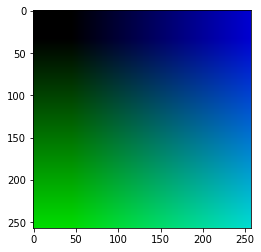

ipdb> pos_encs.max(), pos_encs.min()
(tensor(0.8824), tensor(-0.1751))
ipdb> plt.imshow(pos_encs[0][:,0].permute(1,2,0).cpu()+0.1751); plt.pause(1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


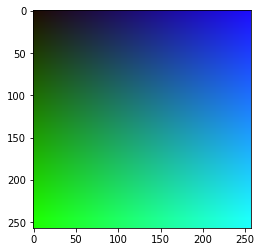

ipdb> self.isotropy
[False, True, True, True, True]
ipdb> self._get_io_conv(out_channel_2nd, self.isotropy[-self.n_feats])
*** NameError: name 'out_channel_2nd' is not defined
ipdb> self._get_io_conv(1, self.isotropy[-self.n_feats])
Sequential(
  (0): Conv3d(32, 1, kernel_size=(5, 5, 5), stride=(1, 1, 1), padding=(2, 2, 2), padding_mode=replicate)
  (1): Identity()
  (2): Identity()
)
ipdb> exit


In [4]:
%debug

In [ ]:
%debug

> /n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/nn/modules/conv.py(569)forward()
    567     def forward(self, input: Tensor) -> Tensor:
    568         if self.padding_mode != 'zeros':
--> 569             return F.conv3d(F.pad(input, self._reversed_padding_repeated_twice, mode=self.padding_mode),
    570                             self.weight, self.bias, self.stride, _triple(0),
    571                             self.dilation, self.groups)

ipdb> up
> /n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/nn/modules/module.py(727)_call_impl()
    725             result = self._slow_forward(*input, **kwargs)
    726         else:
--> 727             result = self.forward(*input, **kwargs)
    728         for hook in itertools.chain(
    729                 _global_forward_hooks.values(),

ipdb> 
> /n/home11/abanerjee/.conda/envs/snemi/lib/python3.8/site-packages/torch/nn/modules/container.py(117)forward()
    115     def forward(self, input

Start training ===>
> /n/home11/abanerjee/vol_dense_seg/src/trainer.py(75)train()
     74 
---> 75             time1 = time.perf_counter()
     76 

ipdb> op = affinities[0][0,:,0].permute(1,2,0); import matplotlib.pyplot as plt; plt.imshow(op.cpu()); plt.pause(1)


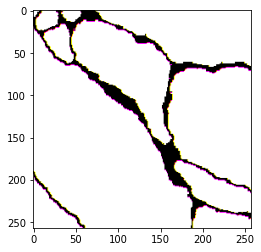

ipdb> exit


BdbQuit: 

In [3]:
trnr.train()

Start training ===>
> /n/home11/abanerjee/vol_dense_seg/src/trainer.py(75)train()
     74 
---> 75             time1 = time.perf_counter()
     76 

ipdb> op = affinities[0][0,:,0].permute(1,2,0)
ipdb> import matplotlib.pyplot as plt; plt.imshow(op.cpu()); plt.pause(1)


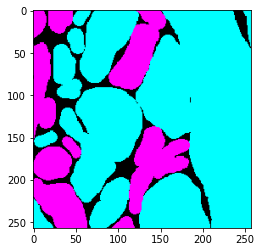

ipdb> op = affinities[0][0,:,0].permute(1,2,0); import matplotlib.pyplot as plt; plt.imshow(op.cpu()); plt.pause(1)


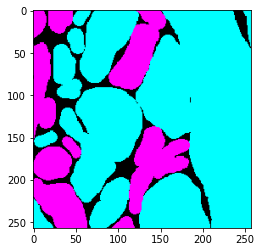

ipdb> exit


BdbQuit: 

In [3]:
trnr.train()

In [9]:
from src.dataloader.build import build_dataset
ds = build_dataset(cfg)

Build data dataset ===>
Image shape: (108, 1152, 1152)
Label shape: (108, 1152, 1152)
Sample size required for the augmentor: [ 19 132 132]
Total number of samples to be generated:  93819690


In [8]:
# ds.mode='val'
dl = torch.utils.data.DataLoader(ds, batch_size=1, shuffle=False)

In [6]:
len(dl)

93819690

In [11]:
for batch,i in zip(dl, range(10)):
    print(batch[0])

[tensor([0]), tensor([0]), tensor([0]), tensor([0])]
[tensor([0]), tensor([0]), tensor([0]), tensor([1])]
[tensor([0]), tensor([0]), tensor([0]), tensor([2])]
[tensor([0]), tensor([0]), tensor([0]), tensor([3])]
[tensor([0]), tensor([0]), tensor([0]), tensor([4])]
[tensor([0]), tensor([0]), tensor([0]), tensor([5])]
[tensor([0]), tensor([0]), tensor([0]), tensor([6])]
[tensor([0]), tensor([0]), tensor([0]), tensor([7])]
[tensor([0]), tensor([0]), tensor([0]), tensor([8])]
[tensor([0]), tensor([0]), tensor([0]), tensor([9])]


In [12]:
ds.sample_size_test

[array([1042441,    1021])]

In [13]:
ds.sample_size

[array([  90, 1021, 1021])]

> /n/home11/abanerjee/vol_dense_seg/src/dataloader/dataset.py(92)_split_masks()
     91         import ipdb; ipdb.set_trace()
---> 92         mask_sizes = np.ceil(np.array(out_label.shape) * np.array(self.mask_scales))
     93         # out_label = resize(out_label.astype(bool), mask_sizes)

ipdb> n
> /n/home11/abanerjee/vol_dense_seg/src/dataloader/dataset.py(94)_split_masks()
     93         # out_label = resize(out_label.astype(bool), mask_sizes)
---> 94         out_label = measure.label(out_label, connectivity=3).astype(np.int32)
     95 

ipdb> np.unique(resize(out_label.astype(int), mask_sizes))
array([5.42101086e-20, 5.80367045e-20, 6.05127372e-20, 6.14131127e-20,
       6.69654283e-20, 6.77157412e-20, 7.58941521e-20, 7.85952786e-20,
       9.75781955e-20, 9.81034146e-20, 1.03955855e-19, 1.05231387e-19,
       1.05231387e-19, 1.06281825e-19, 1.19262239e-19, 1.20987959e-19,
       1.25639899e-19, 1.49124693e-19, 1.51150538e-19, 1.58128448e-19,
       1.59028824e-19, 1.62630326e-1

ipdb> lab = resize(out_label.astype(int), mask_sizes)
ipdb> plt.imshow(lab[0])
ipdb> plt.pause(1)


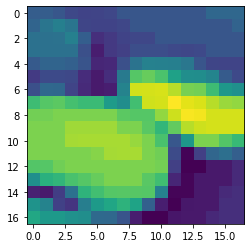

ipdb> lab[0].min(), lab[0].max()
(5.421010862427522e-20, 1.6766867714496417e-18)
ipdb> np.unique(resize(out_label, mask_sizes).astype(int))
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
ipdb> exit


BdbQuit: 

In [62]:
ds[0]

In [72]:
ds[0][0] # This is starting point of volume

[0, 40, 78, 752]

In [5]:
from skimage.measure import label

In [19]:
zer = np.zeros((5,5))
zer[2] = 1
zer[:, 2] = 1
zer[2,2] =2
# zer[[1,3,1,3],[1,1,3,3]] =2
zer[[0,2,2,4],[2,0,4,2]] =2

In [24]:
ds.label[0].shape

(108, 1152, 1152)

In [57]:
vol = ds.label[0][8:10, 200:200+157, 200:200+157]

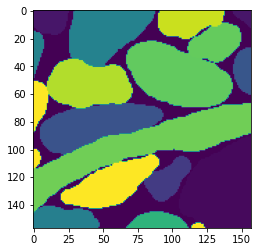

In [58]:
plt.imshow(vol[0])

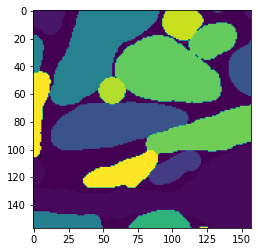

In [59]:
plt.imshow(vol[1])

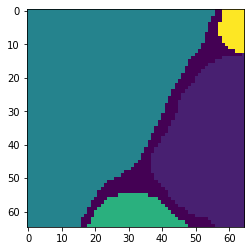

In [31]:
plt.imshow(vol[1])

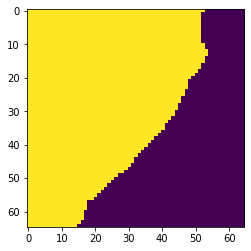

In [36]:
plt.imshow(vol[0]==116)

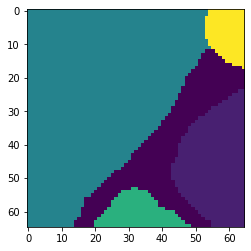

In [54]:
from skimage.morphology import erosion
plt.imshow(erosion(vol[0], np.ones((3,3))))

In [35]:
np.unique(vol)

array([  0,  23, 116, 165, 260], dtype=uint16)

In [43]:
vol_comp = (vol==116).copy()

In [44]:
vol_comp[vol==23] = True

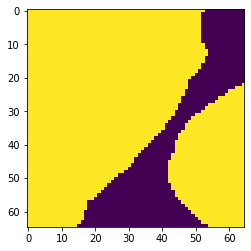

In [45]:
plt.imshow(vol_comp[0])

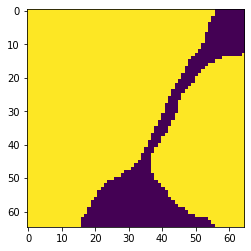

In [47]:
plt.imshow(vol_comp[1])

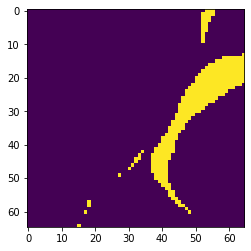

In [48]:
plt.imshow(vol_comp[1] & ~vol_comp[0])

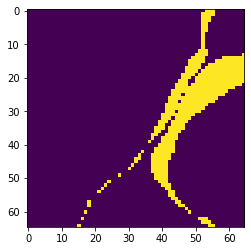

In [50]:
plt.imshow((~vol_comp[1] & vol_comp[0]).astype(int) + (vol_comp[1] & ~vol_comp[0]).astype(int))

In [51]:
vol_comp[1,vol_comp[1] & ~vol_comp[0]] = False

In [52]:
np.unique(label(vol_comp))

array([0, 1, 2], dtype=int32)

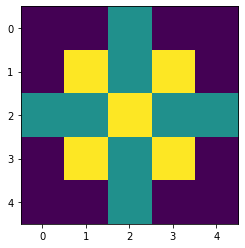

In [11]:
import matplotlib.pyplot as plt
plt.imshow(zer)

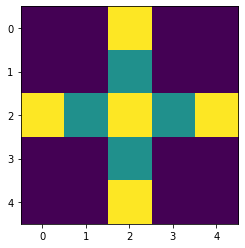

In [20]:
import matplotlib.pyplot as plt
plt.imshow(zer)

In [21]:
np.unique(label(zer, connectivity=2))

array([0, 1, 2, 3, 4, 5, 6])

In [7]:
cfg1 = get_cfg_defaults()
cfg1.merge_from_file('/n/home11/abanerjee/pytorch_connectomics/configs/SNEMI/SNEMI-Base.yaml')
cfg1.DATASET.IMAGE_NAME = 'train-input.tif'
cfg1.DATASET.LABEL_NAME = 'train-labels.tif'
cfg1.DATASET.INPUT_PATH = '/n/home11/abanerjee/pytorch_connectomics/datasets/SNEMI3D/'
cfg1.MODEL.ARCHITECTURE = 'fpn_3d'
cfg1.MODEL.BACKBONE = 'efficientnet'
cfg1.MODEL.BLOCK_TYPE = 'inverted_res'
from connectomics.data.dataset.build import get_dataset
ds1 = get_dataset(cfg1,None)

None 1 ['train-input.tif']
volume shape (original): (100, 1024, 1024)
volume shape (after scaling and padding): (108, 1152, 1152)
label shape: (108, 1152, 1152)
Total number of samples to be generated:  73859072


In [8]:
ds1, ds

(<connectomics.data.dataset.dataset_volume.VolumeDataset at 0x2af1c7096520>,
 <src.dataloader.dataset.VolumeDatasetMasks at 0x2af093ecb070>)

In [10]:
ds1.target_opt, ds.target_opt

(['2'], ['1'])

In [4]:
trnr.train()

Start training ===>
> /n/home11/abanerjee/vol_dense_seg/src/trainer.py(70)train()
     69             # gt_masks = [F.interpolate(label, feat.size()[2:], mode='nearest') for feat in outputs]
---> 70             loss = self.backward_step(output, targets, masks, weights, i)
     71             time3 = time.perf_counter()

ipdb> outputs['affinity'].shape
*** NameError: name 'outputs' is not defined
ipdb> output['affinity'].shape
torch.Size([1, 3, 33, 85, 85])
ipdb> exit


BdbQuit: 

Start training ===>
> /n/home11/abanerjee/vol_dense_seg/src/trainer.py(61)train()
     60             import ipdb; ipdb.set_trace()
---> 61             start = time.perf_counter()
     62             pos, volumes, targets, weights, masks, seeds, coords = next(self.dataloader)

ipdb> n
> /n/home11/abanerjee/vol_dense_seg/src/trainer.py(62)train()
     61             start = time.perf_counter()
---> 62             pos, volumes, targets, weights, masks, seeds, coords = next(self.dataloader)
     63             time1 = time.perf_counter()

ipdb> 
> /n/home11/abanerjee/vol_dense_seg/src/trainer.py(63)train()
     62             pos, volumes, targets, weights, masks, seeds, coords = next(self.dataloader)
---> 63             time1 = time.perf_counter()
     64 

ipdb> 
> /n/home11/abanerjee/vol_dense_seg/src/trainer.py(65)train()
     64 
---> 65             output = self.model(volumes, coords)
     66             time2 = time.perf_counter()

ipdb> pos.shape
*** AttributeError: 'list' object 

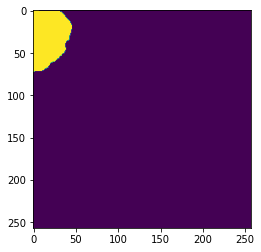

ipdb> plt.imshow(masks[0,0,-1]); plt.pause(1)


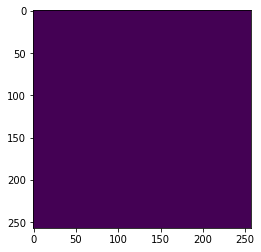

ipdb> plt.imshow(masks[0,0,16]); plt.pause(1)


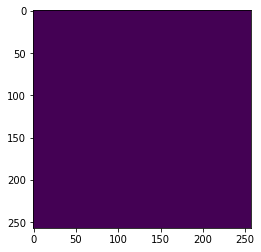

ipdb> plt.imshow(masks[0,1,0]); plt.pause(1)


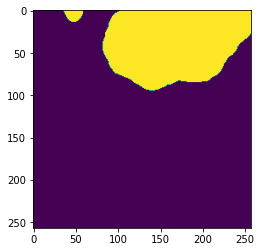

ipdb> plt.imshow(volumes[0,0,0]); plt.pause(1)


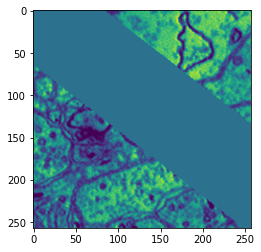

ipdb> plt.imshow(targets[0][0,0,0]); plt.pause(1)


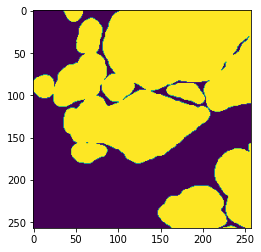

ipdb> targets[0].shape
torch.Size([1, 3, 33, 257, 257])
ipdb> plt.imshow(targets[0][0,1,0]); plt.pause(1)


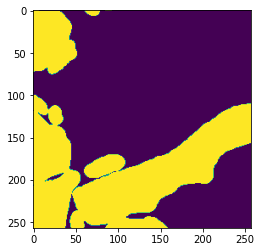

ipdb> plt.imshow(targets[0][0,2,0]); plt.pause(1)


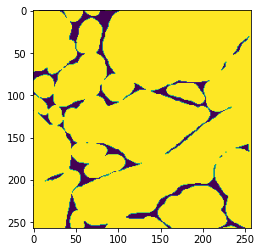

ipdb> targets[0].unique()
tensor([0., 1.])
ipdb> n
RuntimeError: Given groups=1, weight of size [8, 2, 3, 3, 3], expected input[1, 1, 35, 259, 259] to have 2 channels, but got 1 channels instead
> /n/home11/abanerjee/vol_dense_seg/src/trainer.py(65)train()
     64 
---> 65             output = self.model(volumes, coords)
     66             time2 = time.perf_counter()

ipdb> 
--Return--
None
> /n/home11/abanerjee/vol_dense_seg/src/trainer.py(65)train()
     64 
---> 65             output = self.model(volumes, coords)
     66             time2 = time.perf_counter()

ipdb> 
RuntimeError: Given groups=1, weight of size [8, 2, 3, 3, 3], expected input[1, 1, 35, 259, 259] to have 2 channels, but got 1 channels instead
> <ipython-input-3-57696dadc8f9>(1)<module>()
----> 1 trnr.train()

ipdb> volumes.shape
*** NameError: name 'volumes' is not defined
ipdb> up
*** all frames above hidden
ipdb> down
None
> /n/home11/abanerjee/vol_dense_seg/src/trainer.py(65)train()
     64 
---> 65             

BdbQuit: 

In [3]:
trnr.train()

In [2]:
import torch
a = torch.randn(1,5,4,4)
s = a.split([3], dim=1)
s[0].shape,s[1].shape

RuntimeError: split_with_sizes expects split_sizes to sum exactly to 5 (input tensor's size at dimension 1), but got split_sizes=[3]

In [5]:
trnr.model.module.backbone

IntermediateLayerGetter(
  (conv1): DilatedBlock(
    (conv): ModuleList(
      (0): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False, padding_mode=replicate)
      (1): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(2, 2, 2), dilation=(2, 2, 2), bias=False, padding_mode=replicate)
      (2): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(4, 4, 4), dilation=(4, 4, 4), bias=False, padding_mode=replicate)
      (3): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(8, 8, 8), dilation=(8, 8, 8), bias=False, padding_mode=replicate)
    )
  )
  (bn1): GroupNorm(16, 32, eps=1e-05, affine=True)
  (relu): ELU(alpha=1.0, inplace=True)
  (layer0): Sequential(
    (0): InvertedResidualDilated(
      (DWConv): ModuleList(
        (0): Conv3d(8, 8, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), groups=8, bias=False, padding_mode=replicate)
        (1): Conv3d(8, 8, kernel_size=(1, 3, 3), stride=(1, 1, 1), p

In [6]:
trnr.model.module

DualDecoderFPN3D(
  (backbone): IntermediateLayerGetter(
    (conv1): DilatedBlock(
      (conv): ModuleList(
        (0): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False, padding_mode=replicate)
        (1): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(2, 2, 2), dilation=(2, 2, 2), bias=False, padding_mode=replicate)
        (2): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(4, 4, 4), dilation=(4, 4, 4), bias=False, padding_mode=replicate)
        (3): Conv3d(2, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(8, 8, 8), dilation=(8, 8, 8), bias=False, padding_mode=replicate)
      )
    )
    (bn1): GroupNorm(16, 32, eps=1e-05, affine=True)
    (relu): ELU(alpha=1.0, inplace=True)
    (layer0): Sequential(
      (0): InvertedResidualDilated(
        (DWConv): ModuleList(
          (0): Conv3d(8, 8, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1), groups=8, bias=False, padding_mode=replicate)
        